In [58]:
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from scipy.io import wavfile
import pyroomacoustics as pra
import samplerate

In [77]:
fs, audio = wavfile.read('piano_example.wav')
audio = samplerate.resample(audio, 8000 / fs, 'sinc_best')
fs = 8000

/Users/scheibler/anaconda3/lib/python3.6/site-packages/scipy/io/wavfile.py:273: WavFileWarning: Chunk (non-data) not understood, skipping it.
  WavFileWarning)


In [96]:
# size for the figures
mm2in = 0.0393701
fig_spec_size = (40 * mm2in, 28 * mm2in)
latent_size = 8.5 * mm2in
fig_H_size = (fig_spec_size[0], latent_size)
fig_W_size = (latent_size, fig_spec_size[1])

<IPython.core.display.Javascript object>


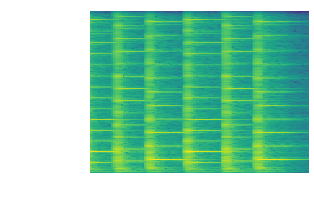

In [99]:
# Compute the spectrogram
nfft = 2048
hop = 256
window = pra.hann(nfft)
T = audio.shape[0] / fs

# Get the STFT
X = pra.stft(audio[:int(T*fs)], nfft, hop, transform=np.fft.rfft, win=window)

# Display
plt.figure(figsize=fig_spec_size)
plt.imshow(20 * np.log10(np.abs(X.T)), origin='lower', aspect='auto', extent=[0, T, 0, fs // 2])
plt.axis('off')
plt.savefig('nmf_example_spectrogram.pdf')

In [86]:
model = sklearn.decomposition.NMF(n_components=3, init='random', random_state=0)
W = model.fit_transform(np.abs(X.T))
H = model.components_

<IPython.core.display.Javascript object>


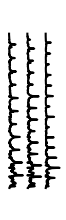

<IPython.core.display.Javascript object>


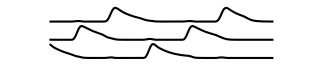

In [107]:
plt.figure(figsize=fig_W_size)
freq = np.arange(W.shape[0]) / nfft * fs
for i, w in enumerate(W.T):
    plt.subplot(1, W.shape[1], i+1)
    plt.plot(np.log(w+20), freq, 'k', linewidth=0.75, clip_on=False)
    plt.axis('off')

plt.savefig('nmf_example_W.pdf')

plt.figure(figsize=fig_H_size)
for i, h in enumerate(H):
    plt.subplot(H.shape[0] , 1, i+1)
    plt.plot(h, 'k', linewidth=0.75, clip_on=False)
    plt.axis('off')
plt.savefig('nmf_example_H.pdf')

<IPython.core.display.Javascript object>


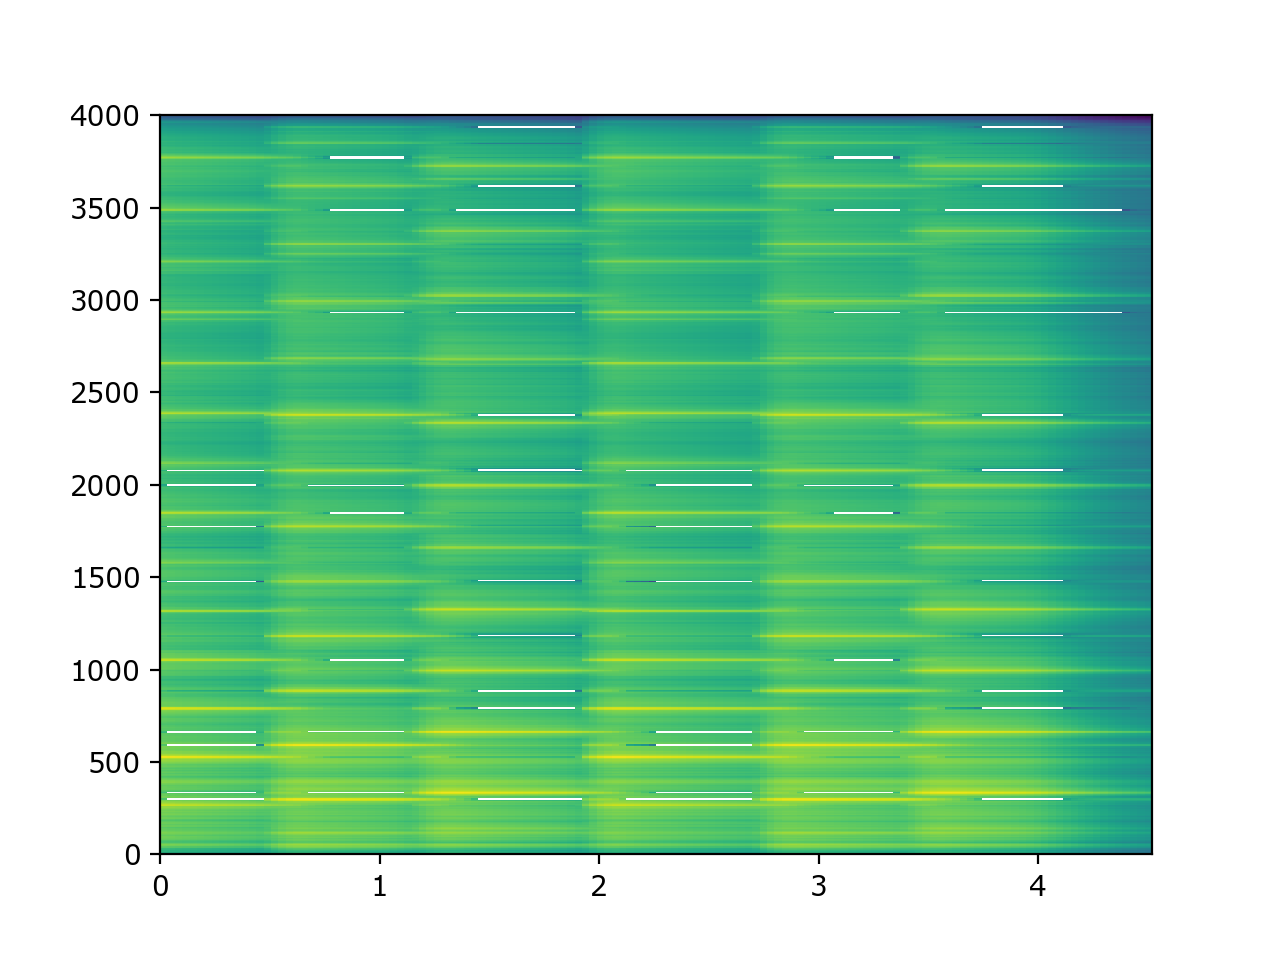

/Users/scheibler/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in log10
  


In [88]:
plt.figure()
plt.imshow(10 * np.log10(np.abs(np.dot(W, H))), origin='lower', aspect='auto', extent=[0, audio.shape[0] / fs, 0, fs // 2])

In [116]:
# Now plot a speech mix
fs, audio = wavfile.read('separake_mu_mix_fq_sample3_fq_sample2.wav')

<IPython.core.display.Javascript object>


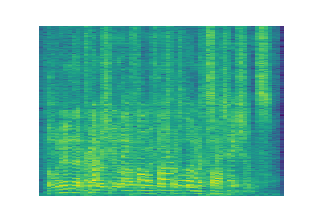

In [117]:
# Get the STFT
X = pra.stft(audio[:int(T*fs)], nfft, nfft//2, transform=np.fft.rfft, win=window)

# Display
plt.figure(figsize=fig_spec_size)
plt.imshow(20 * np.log10(np.abs(X.T)), origin='lower', aspect='auto', extent=[0, T, 0, fs // 2])
plt.axis('off')
plt.savefig('nmf_speech_mix_spectrogram.pdf')